In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

import comptools as comp

%matplotlib inline

In [2]:
sns.set_context(context='paper', font_scale=1.75)

In [3]:
df_sim_train, df_sim_test = comp.load_sim(config='IC86.2012', test_size=0.5, verbose=True)

[#                                       ] | 3% Completed |  0.1s

/home/jbourbeau/cr-composition/.virtualenv/lib/python2.7/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  0.1s


In [4]:
df_sim_test.head()

,FractionContainment_Laputop_IceTop,FractionContainment_Laputop_InIce,FractionContainment_MCPrimary_IceTop,FractionContainment_MCPrimary_InIce,IceTopLLHRatio,IceTopMaxSignal,IceTopMaxSignalInEdge,IceTopMaxSignalString,IceTopNeighbourMaxSignal,IceTop_charge_beyond_0m,...,lap_cos_zenith,log_s50,log_s80,log_s125,log_s180,log_s250,log_s500,log_dEdX,reco_log_energy,reco_energy
12360_18613_52_0,0.379626,0.249300,0.374419,0.258233,10.412583,188.481140,0,27,72.263519,283.066990,...,0.984633,1.370017,0.804903,0.244963,-0.229421,-0.669786,-1.639385,1.018793,6.290687,1.952932e+06
12631_2243_86_0,0.695386,0.731950,0.703351,0.715170,22.240263,79.426804,0,39,79.426804,235.309669,...,0.893669,2.510796,1.879095,1.255928,0.729885,0.242979,-0.824820,1.917759,7.261951,1.827894e+07
12362_922_23_0,0.674846,0.839638,0.676209,0.840778,30.341618,112.659660,0,39,112.659660,240.849009,...,0.983260,2.357847,1.778757,1.205547,0.720321,0.270187,-0.720023,2.010233,7.173221,1.490121e+07
12630_12973_7_0,0.699867,0.444447,0.691566,0.462568,10.726188,34.660755,0,64,20.567366,62.875596,...,0.992275,1.693047,0.970657,0.261376,-0.335027,-0.885320,-2.086865,0.422414,6.291234,1.955391e+06
12362_2358_29_0,0.494816,0.606553,0.502146,0.607387,15.752631,23.606428,0,48,17.062416,87.071176,...,0.965630,2.163673,1.480833,0.809108,0.243389,-0.279260,-1.422478,1.552130,6.797043,6.266752e+06


In [5]:
energybins = comp.get_bins()
energybins

[array([6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3,
        7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ]), array([0, 1, 2])]

/home/jbourbeau/cr-composition/.virtualenv/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


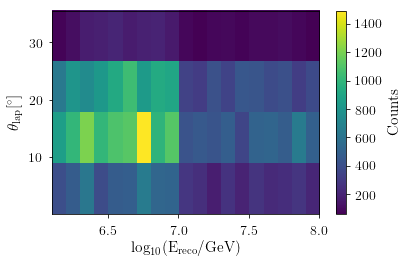

In [6]:
plt.hist2d(df_sim_test['reco_log_energy'],
           np.rad2deg(df_sim_test['lap_zenith']),
           bins=[energybins[0], 4])
#            norm=LogNorm())
plt.colorbar(label='Counts')
plt.xlabel('$\mathrm{\log_{10}(E_{reco}/GeV)}$')
plt.ylabel('$\mathrm{\\theta_{lap} [^{\circ}]}$')
# plt.ylabel('$\mathrm{\cos(\\theta)}$')
plt.show()

In [7]:
h, _, _ = np.histogram2d(df_sim_test['reco_log_energy'],
                         np.rad2deg(df_sim_test['lap_zenith']),
                         bins=[energybins[0], 4])

In [15]:
sns.heatmap(h.T)
# sns.heatmap(h.T, annot=True, fmt='0.0f', square=True, robust=True)
plt.gca().invert_yaxis()
plt.xlabel('$\mathrm{\log_{10}(E_{reco}/GeV)}$')
plt.ylabel('$\mathrm{\\theta_{lap} [^{\circ}]}$')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/jbourbeau/cr-composition/.virtualenv/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/jbourbeau/cr-composition/.virtualenv/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/home/jbourbeau/cr-composition/.virtualenv/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib64/python2.7/inspect.py", line 1048, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib64/python2.7/inspect.py", line 1008, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/cvmfs/icecu

IndexError: string index out of range